In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import genfromtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten


In [18]:
x_train=np.loadtxt('input.csv' , delimiter=',')
y_train=np.loadtxt('labels.csv' , delimiter=',')
x_test=np.loadtxt('input_test.csv' , delimiter=',')
y_test=np.loadtxt('labels_test.csv' , delimiter=',')

In [19]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train=x_train/255
x_train=x_train/255


In [20]:
print("shape of x_train :", x_train.shape)
print("shape of y_train :", y_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of y_test :", y_test.shape)

shape of x_train : (2000, 100, 100, 3)
shape of y_train : (2000, 1)
shape of x_test : (400, 100, 100, 3)
shape of y_test : (400, 1)


In [21]:
x_train[1,:]

array([[[0.00201461, 0.00196847, 0.00207612],
        [0.00246059, 0.00241446, 0.00252211],
        [0.00304498, 0.00295271, 0.00313725],
        ...,
        [0.00384468, 0.0038293 , 0.00379854],
        [0.00392157, 0.00392157, 0.00389081],
        [0.00384468, 0.0038293 , 0.00376778]],

       [[0.00215302, 0.00210688, 0.00221453],
        [0.00195309, 0.00190696, 0.00201461],
        [0.00184544, 0.00175317, 0.00190696],
        ...,
        [0.00386005, 0.00389081, 0.00387543],
        [0.00390619, 0.00392157, 0.00389081],
        [0.00390619, 0.00392157, 0.00386005]],

       [[0.00313725, 0.0031065 , 0.00318339],
        [0.00287582, 0.00284506, 0.00292195],
        [0.00226067, 0.00218378, 0.00227605],
        ...,
        [0.0038293 , 0.00392157, 0.00392157],
        [0.00366013, 0.00379854, 0.00372165],
        [0.00356786, 0.00370627, 0.00362937]],

       ...,

       [[0.00267589, 0.00279892, 0.00299885],
        [0.00264514, 0.00276817, 0.00296809],
        [0.00273741, 0

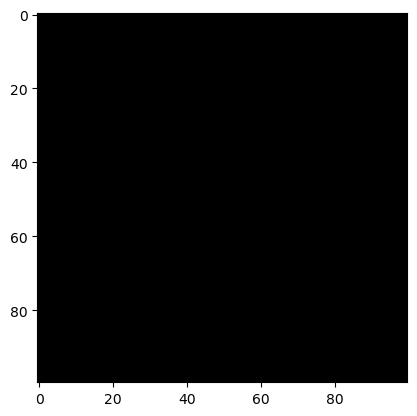

In [31]:
idx = random.randint(0 , len(x_train))
plt.imshow(x_train[idx , :].astype("uint8"))
plt.show()

In [30]:
model=Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64 , activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 11s 278ms/step - loss: 0.6935 - accuracy: 0.4950
Epoch 2/5
32/32 [==============================] - 10s 306ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 9s 293ms/step - loss: 0.6932 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 9s 291ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 9s 286ms/step - loss: 0.6933 - accuracy: 0.5000


In [26]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 38ms/step - loss: 72.8316 - accuracy: 0.5000


[72.83164978027344, 0.5]

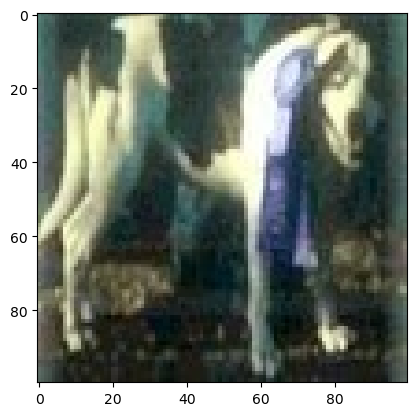

1/1 [==============================] - 0s 29ms/step
our model says its a : cat


In [41]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2 , :].astype("uint8"))
plt.show()
y_pred = model.predict(x_test[idx2 , : ].reshape(1,100,100,3))
y_pred=y_pred > 0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
    print("our model says its a :",pred)
